In [267]:
import pandas as pd
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import chart_studio.plotly as py # type: ignore
import plotly.graph_objs as go # type: ignore
from plotly.offline import plot # type: ignore

# Read the data set

In [268]:
df = pd.read_csv('tesla.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# Data set information

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [270]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [271]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [272]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_22828\2394721818.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [273]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}') 
print(f'Total days = {(df.Date.max()  - df.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


# Checking for nulls

In [274]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Drop Duplicates

In [275]:
df.drop_duplicates()
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,2019-03-11,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,2019-03-12,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,2019-03-14,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


## Sorting Data

In [276]:
df_sorted = df.sort_values(by='Date')

In [277]:
import pandas as pd # type: ignore

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

remove_outliers(df,df.columns)

,Date,Open,High,Low,Close,Adj Close,Volume
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
...,...,...,...,...,...,...,...
2188,2019-03-11,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,2019-03-12,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,2019-03-14,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


<Axes: >

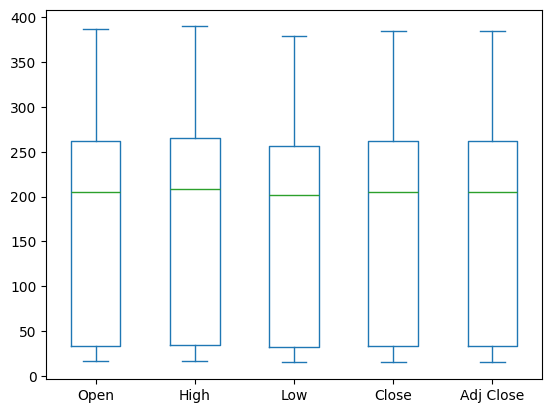

In [278]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >, <Axes: >]],
      dtype=object)

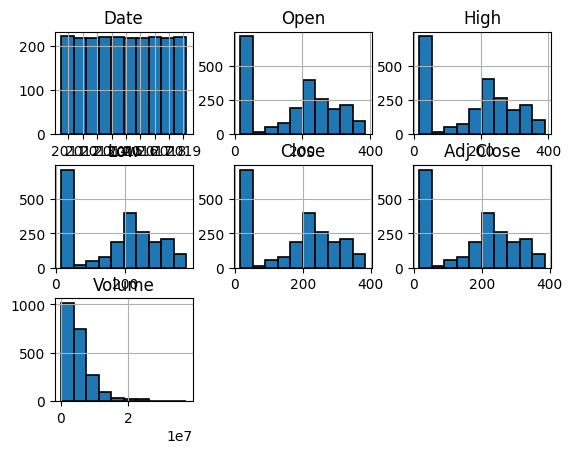

In [279]:
df.hist(edgecolor='black', linewidth=1.2)

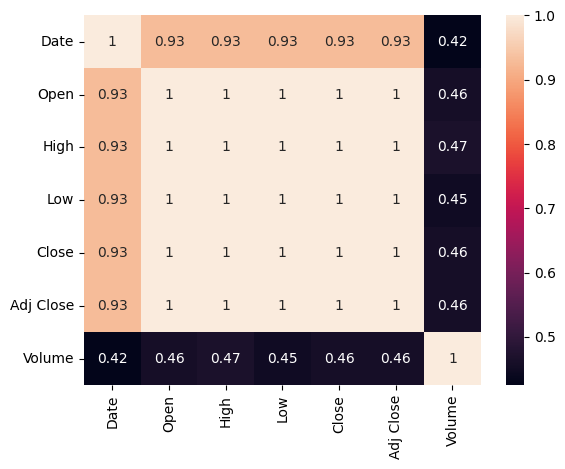

In [280]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()
           

# Splitting the data set into traint and test data

In [281]:
# split X and y into training and
from sklearn.model_selection import train_test_split # type: ignore

X = df.drop(columns=['Date', 'Close'])  # Drop Date and target columns from features
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train

,Open,High,Low,Adj Close,Volume
2137,313.500000,314.500000,295.200012,295.390015,5559900
2175,304.410004,306.299988,299.000000,302.559998,7142100
429,34.689999,36.290001,34.599998,36.009998,1963300
852,138.919998,140.399994,134.110001,137.600006,12203700
1565,196.490005,202.520004,196.399994,200.419998,3077200
...,...,...,...,...,...
456,32.750000,33.430000,32.500000,33.160000,774900
1921,320.839996,326.170013,318.519989,322.309998,3950700
709,50.900002,51.049999,48.980000,50.430000,2630000
174,24.600000,24.959999,24.000000,24.660000,1399900


# Feature Scaling

In [282]:
#z=(x-u)/s
from sklearn.preprocessing import StandardScaler # type: ignore
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

# Linear Regression

In [283]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

####  train or fit model


In [284]:
model.fit(X_train,y_train)

LinearRegression()

In [285]:
y_pred = model.predict(X_test) 
y_pred

array([ 36.15204872,  29.49614933, 259.57622931, 313.31425469,
        25.91296017, 331.70143025,  30.28150706, 287.76071062,
       246.69636889,  24.90181238,  27.13026214, 298.76551413,
       256.74894012,  26.6099633 , 167.75820997, 202.67712634,
       279.55374737, 258.2902096 , 350.24565066, 262.3446187 ,
       345.31754789,  29.25072535, 206.00507554,  22.585009  ,
       172.28382919, 320.51010254, 290.33274904,  35.31760521,
       197.48396175,  15.05540122, 214.4574775 , 334.05749459,
       253.15592909, 280.00531866, 274.27221836, 293.82758459,
       195.58928075, 283.91247926, 343.79593098,  18.37353445,
       315.23837085,  21.5247774 , 223.13566657,  24.33242874,
       204.56198056, 270.62030852,  26.76703465, 356.85247506,
        18.83493153, 205.40624005, 327.25434867, 235.04364213,
       199.44735361,  22.91878562, 333.41939813, 294.45588471,
        32.21544607, 291.55007261, 347.70306213, 245.28273853,
       268.70598967, 214.68326364,  30.93924235,  35.77

<Axes: >

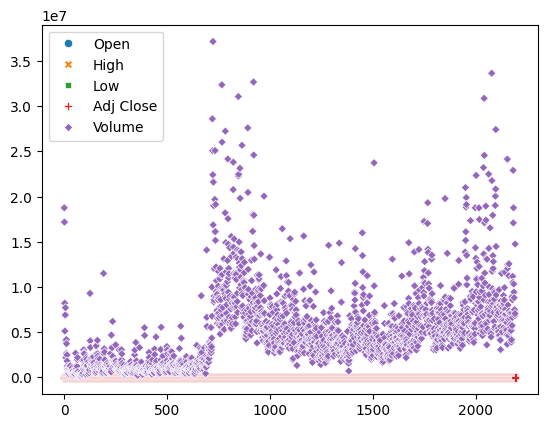

In [286]:
sns.scatterplot(data=X)

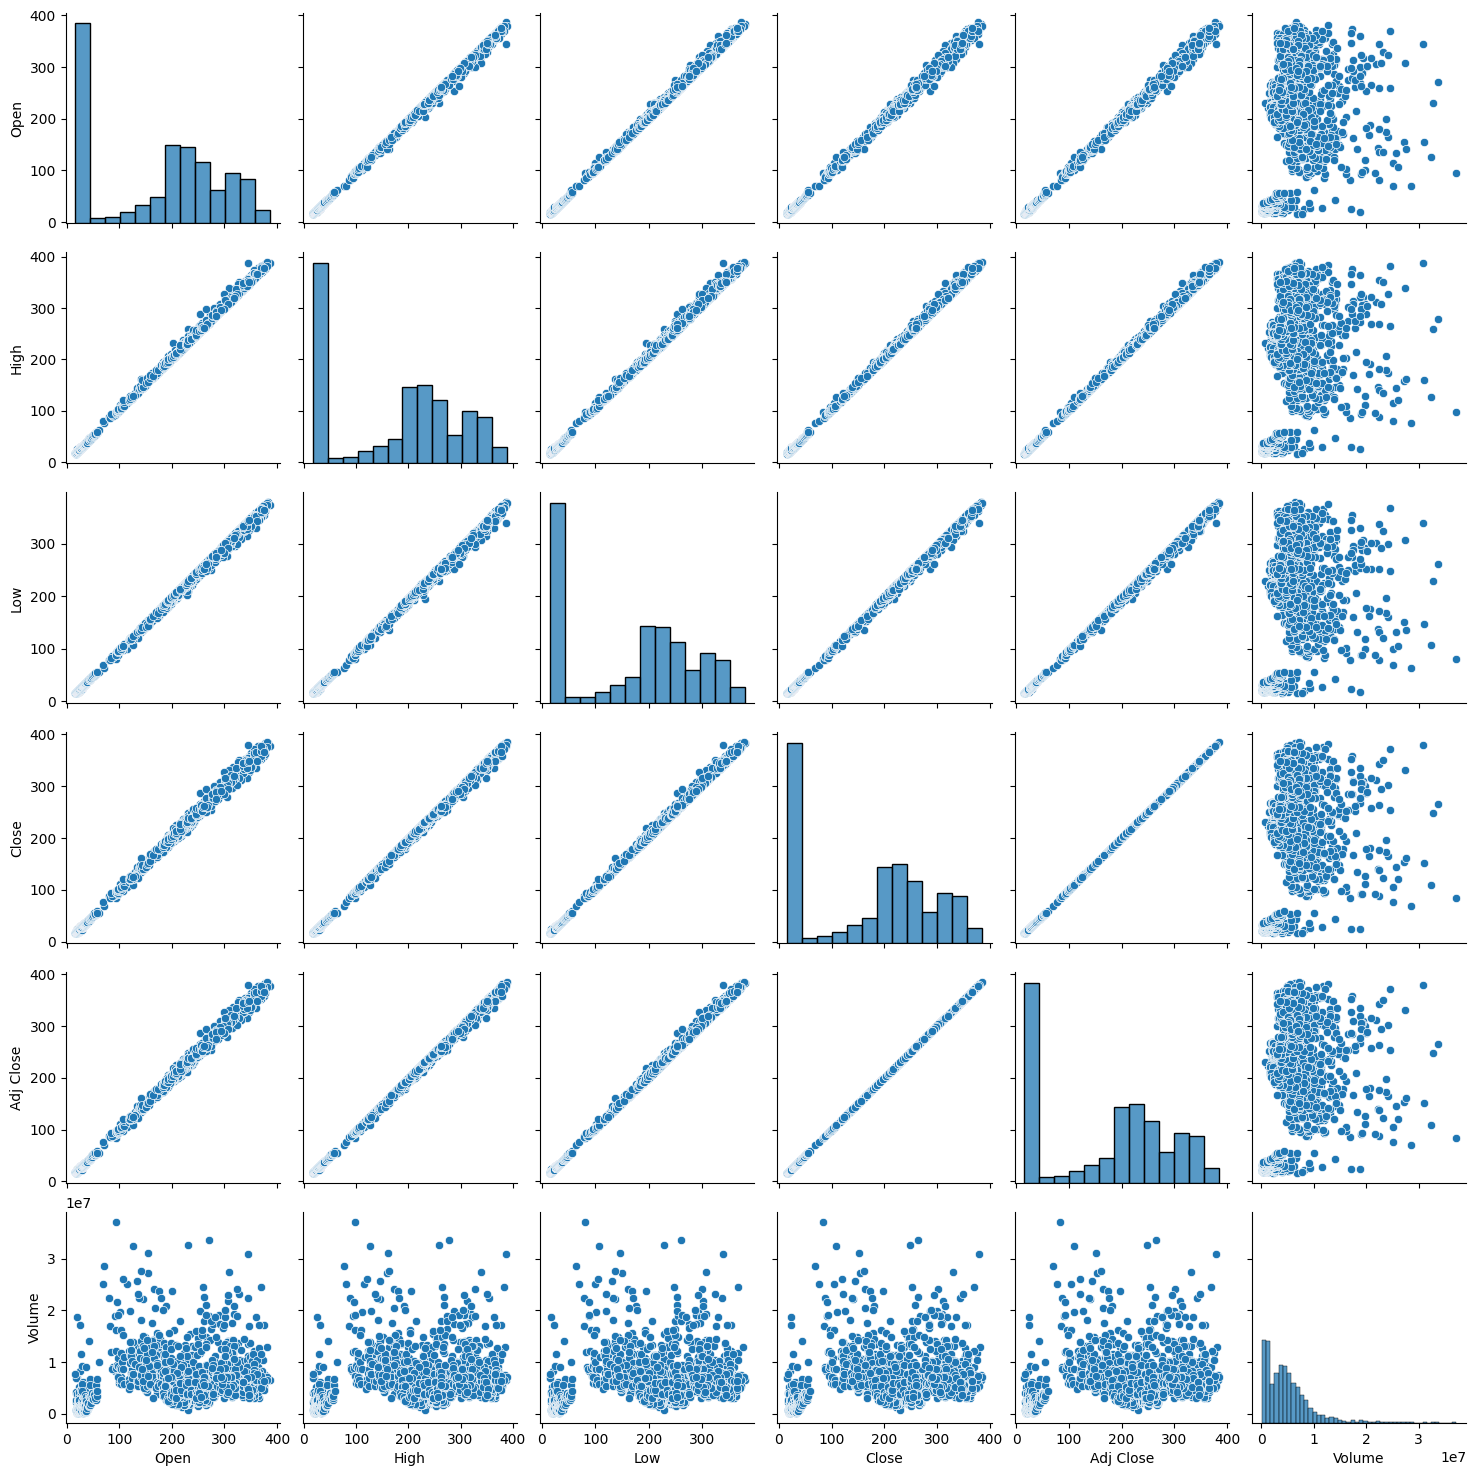

In [287]:
sns.pairplot(data=df)